# Ising model on infinite random regular graph
Use the `RegularFactorGraph` type to run Belief Propagation on an infinite random graph of fixed degree $k$ for an Ising distribution
\begin{equation*}
p(\underline{\sigma}) = \frac1Z e^{J\sum_{(ij)}\sigma_i\sigma_j + h \sum_{i=1}^N\sigma_i}
\end{equation*}

In [1]:
using IndexedFactorGraphs
using BeliefPropagation, BeliefPropagation.Models

In [8]:
k = 4
g = InfiniteRegularFactorGraph(k, 2);

## Magnetization
$m = \frac1N \sum\limits_{i=1}^N\sigma_i p(\sigma_i)$

In [9]:
function magnetization(J, h)
    ψ = [IsingCoupling(J)]
    ϕ = [IsingField(h)]
    bp = fast_ising_bp(g, ψ, ϕ)
    bp.h .= rand.()
    iters = iterate!(bp; maxiter, tol=1e-8, damp=0.2)
    m = tanh(only(bp.b))
end

magnetization (generic function with 1 method)

In [10]:
maxiter = 500
Js = LinRange(0, 0.8, 500)
h = 0.0
ms = [magnetization(J, h) for J in Js];

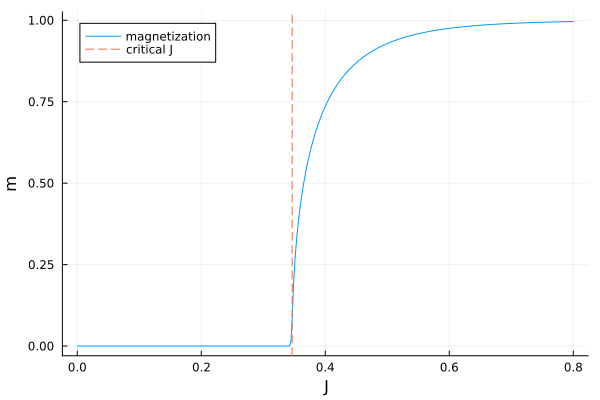

In [11]:
using Plots
plot(Js, ms, xlabel="J", ylabel="m", label="magnetization")
vline!([atanh(1/(k-1))], ls=:dash, label="critical J")

## Magnetic susceptibility
$\chi = \frac{\partial m}{\partial h}$

In [12]:
import ForwardDiff.derivative
χs = [derivative( h -> magnetization(J, h), 0.0) for J in Js];

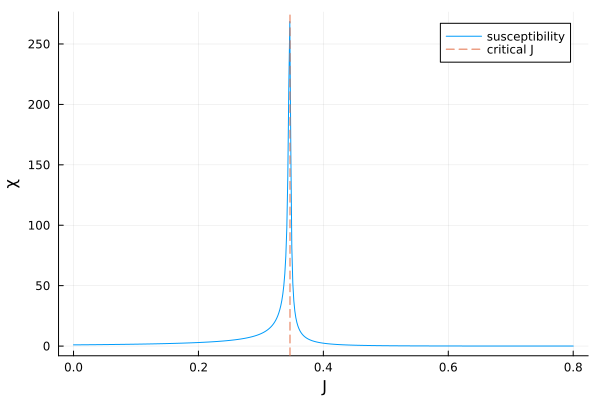

In [13]:
plot(Js, χs, xlabel="J", ylabel="χ", label="susceptibility")
vline!([atanh(1/(k-1))], ls=:dash, label="critical J")